<a href="https://colab.research.google.com/github/spatika1504/DS5500_capstone_project/blob/main/phase2_medium_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.style as style
from sklearn.feature_extraction import text

import warnings
warnings.filterwarnings("ignore")
style.use('dark_background')

In [3]:
main_df = pd.read_csv('ted_main.csv')

In [4]:
main_df['speaker_occupation'] = main_df.speaker_occupation.fillna(main_df.speaker_occupation.mode()[0])

In [6]:
df1 = pd.read_csv("ted_main.csv")
df1.head(1)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110


In [7]:
import datetime
df1['film_date'] = df1['film_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))
df1['published_date'] = df1['published_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))

In [8]:
df1.dropna(subset=['speaker_occupation'],inplace=True)

In [9]:
df1.reset_index(inplace=True)

In [10]:
df1_new = df1[['comments', 'event', 'main_speaker','title', 'speaker_occupation', 'views', 'published_date']]

**Recommendation System based on Tags**


clean the tags

In [11]:
import re

In [12]:
def clean_text(x):
    letter_only=re.sub("[^a-zA-Z]", " ", x)
    return ' '.join(letter_only.split()).lower()

In [13]:
df1_new['tags']=df1['tags']
df1_new.tags=df1_new.tags.astype('str')

In [14]:
df1_new['tags']=df1_new['tags'].apply(clean_text)

In [15]:
df1_new.head(1)

,comments,event,main_speaker,title,speaker_occupation,views,published_date,tags
0,4553,TED2006,Ken Robinson,Do schools kill creativity?,Author/educator,47227110,27-06-2006,children creativity culture dance education pa...


**Convert to sparse matrix using count vectorize**


In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
cv=CountVectorizer()
cv_tags=cv.fit_transform(df1_new['tags'])
df_genres=pd.DataFrame(cv_tags.todense(), columns=cv.get_feature_names(), index=df1_new['title'])

**using Cosine Similarity**

In [18]:
from sklearn.metrics.pairwise import cosine_similarity

In [19]:
cos_sim=cosine_similarity(cv_tags)

In [20]:
def get_recommendation_based_title(x):
    index_to_search = df1_new[df1_new['title']==x].index[0]
    series_similar=pd.Series(cos_sim[index_to_search])
    index_similar=series_similar.sort_values(ascending=False).head(10).index
    return df1_new.loc[index_similar]

In [24]:
get_recommendation_based_title('Every kid needs a champion')

,comments,event,main_speaker,title,speaker_occupation,views,published_date,tags
1490,632,TED Talks Education,Rita Pierson,Every kid needs a champion,Educator,7469445,03-05-2013,children education motivation teaching
1495,120,TED Talks Education,Pearl Arredondo,"My story, from gangland daughter to star teacher",Teacher,1059278,08-05-2013,children education teaching
651,152,TEDIndia 2009,Shukla Bose,Teaching one child at a time,Education activist,940686,30-03-2010,children education global development poverty ...
684,454,TEDxNYED,Dan Meyer,Math class needs a makeover,Educator,2465179,13-05-2010,tedx children education math student teaching
2322,37,TED Talks Live,Victor Rios,Help for kids the education system ignores,"Educator, author",1158432,17-11-2016,children communication compassion education em...
1800,70,TED@NYC,Jarrett J. Krosoczka,Why lunch ladies are heroes,Author/illustrator,1260362,20-08-2014,books children education
1497,321,TED Talks Education,Geoffrey Canada,Our failing schools. Enough is enough!,Education reformer,1786965,08-05-2013,business children education
0,4553,TED2006,Ken Robinson,Do schools kill creativity?,Author/educator,47227110,27-06-2006,children creativity culture dance education pa...
711,683,TEDxEdmonton,Cameron Herold,Let's raise kids to be entrepreneurs,Entrepreneur,1579033,17-06-2010,tedx business children education entrepreneur ...
280,174,LIFT 2007,Sugata Mitra,Kids can teach themselves,Education researcher,1486853,27-08-2008,children cities culture education global issue...


In [22]:
def get_recommendation_based_speakers(x):
    index_to_search = df1_new[df1_new['main_speaker']==x].index[0]
    series_similar=pd.Series(cos_sim[index_to_search])
    index_similar=series_similar.sort_values(ascending=False).head(10).index
    return df1_new.loc[index_similar]

In [31]:
get_recommendation_based_speakers('Hans Rosling')

,comments,event,main_speaker,title,speaker_occupation,views,published_date,tags
4,593,TED2006,Hans Rosling,The best stats you've ever seen,Global health expert; data visionary,12005869,27-06-2006,africa asia google demo economics global devel...
117,261,TED2007,Hans Rosling,New insights on poverty,Global health expert; data visionary,3243784,25-06-2007,africa asia google economics global developmen...
502,122,TED@State,Hans Rosling,Let my dataset change your mindset,Global health expert; data visionary,1471039,27-08-2009,africa asia data global development global iss...
1814,177,TEDSalon Berlin 2014,Hans and Ola Rosling,How not to be ignorant about the world,Global health expert; data visionary,3673455,11-09-2014,global issues health statistics
122,136,TED2007,Emily Oster,Flip your thinking on AIDS in Africa,Assumption-busting economist,854967,12-07-2007,aids africa economics global issues health sci...
127,97,TEDGlobal 2007,George Ayittey,Africa's cheetahs versus hippos,Economist,648234,30-07-2007,africa business corruption economics entrepren...
1094,119,TEDxCanberra,Thomas Pogge,Medicine for the 99 percent,Philosopher,242251,18-12-2011,tedx economics global issues health
1604,207,TEDGlobal 2013,Charles Robertson,Africa's next boom,Emerging-markets economist,1204089,22-10-2013,africa business economics global issues
1857,100,TEDGlobal 2014,Michael Green,What the Social Progress Index can reveal abou...,Social progress expert,1132771,11-11-2014,economics global issues policy statistics
234,139,TED2008,Paul Collier,"The ""bottom billion""",Economist,990220,28-05-2008,africa activism business economics global deve...


In [33]:
def get_recommendation_based_speaker_occupation(x):
    index_to_search = df1_new[df1_new['speaker_occupation']==x].index[0]
    series_similar=pd.Series(cos_sim[index_to_search])
    index_similar=series_similar.sort_values(ascending=False).head(10).index
    return df1_new.loc[index_similar]

get_recommendation_based_speaker_occupation('Designer')

,comments,event,main_speaker,title,speaker_occupation,views,published_date,tags
165,156,TED2007,Philippe Starck,Design and destiny,Designer,1783740,04-12-2007,design humanity humor philosophy storytelling
232,76,TED2002,Arthur Ganson,Moving sculpture,Sculptor,672113,27-05-2008,art design engineering entertainment humor phi...
1254,68,TED2012,John Hockenberry,We are all designers,Journalist,737230,11-06-2012,design humor journalism
320,87,TED2008,Rives,A story of mixed emoticons,"Performance poet, multimedia artist",1594241,28-10-2008,design entertainment humor love media poetry s...
437,112,TED2009,Sarah Jones,A one-woman global village,Polymorphic playwright,1607397,29-04-2009,culture humanity humor identity performance st...
1387,183,TEDGlobal 2012,Paolo Cardini,"Forget multitasking, try monotasking",Designer,2324212,30-11-2012,culture design humor product design technology
1970,109,TED2015,Roman Mars,Why city flags may be the worst-designed thing...,Digital storyteller,4597270,14-05-2015,cities design government humor product design
364,50,TED2005,Greg Lynn,Organic algorithms in architecture,Designer,346702,09-01-2009,design
515,108,TEDGlobal 2009,John Lloyd,An inventory of the invisible,Producer,1159134,16-09-2009,comedy humor philosophy science
1808,503,TED2014,Jim Holt,Why does the universe exist?,Writer and philosopher,2890269,02-09-2014,philosophy


Based on 3 function above, we can get reccomendation using title, main speakers and speakers occupation based on tags on the video. to get the similarity tags we are using count vectorizer to make the binary, and then transform it into numbers that can be count based on their cosine similarity to get their nearest tags

**PCA AND CLUSTERING**

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import ast

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

from wordcloud import WordCloud
from wordcloud import get_single_color_func

from collections import Counter


SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) 

cmap_string = 'Spectral'

In [35]:
# data downloaded from Kaggle: https://www.kaggle.com/rounakbanik/ted-talks
df = pd.read_csv('ted_main.csv')

df['date'] = pd.to_datetime(df.film_date, unit='s')

df.head(3)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,date
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,2006-02-25
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,2006-02-25
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,2006-02-24


In [36]:
#First let's clean up the talk keyword tags.

df.tags = df.tags.apply(ast.literal_eval)
df['tags_single_string'] = df.tags.apply(' '.join)

Next we will use CountVectorizer and TfidfTransformer applied to each talk's set of keywords. CountVectorizer essentially counts the number of times each word appears, and TfidfTransformer inversely weights each word by how frequently it occurs across all talks' metadata.

In [37]:
# get word counts and TF-IDF arrays from tags
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

X = df.tags_single_string.values

print(f'The first talk keywords: [{X[0]}]')

countv = CountVectorizer()
X_counts = countv.fit_transform(X)

tfidf = TfidfTransformer()
X_tfidf = tfidf.fit_transform(X_counts)

The first talk keywords: [children creativity culture dance education parenting teaching]


The first talk keywords: [children creativity culture dance education parenting teaching]

A common first step in unsupervised learning is to reduce the dimensions of your data. This will allow us to plot the data in 2 dimensions to visualize it and get a sense of what is going on. Principal component analysis (PCA) is a method which finds the axes of highest variance in the data and rotates the data so that the first dimension corresponds to the greatest variance, the second dimension corresponds to the second greatest variance, and so on.

Let's first run PCA on our data to visualize the distribution of talks in this dimensionally reduced PC space.

TypeError: ignored

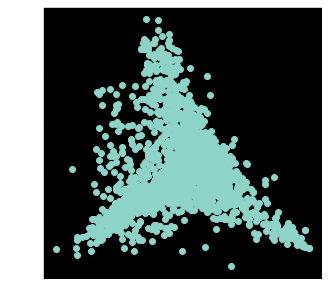

In [38]:
pca_comps = 2
pca = PCA(n_components=pca_comps)
x_pca = pca.fit_transform(X_tfidf.toarray())

fig, ax = plt.subplots(1,1, figsize=(5,5))
scatter, = ax.scatter(x_pca[:,0], x_pca[:,1])
ax.legend(*scatter.legend_elements())
ax.set_xlabel(f'PC 1 ({100*pca.explained_variance_ratio_[0]: 0.2f}%)')
ax.set_ylabel(f'PC 2 ({100*pca.explained_variance_ratio_[1]: 0.2f}%)')
plt.show()


It looks like the data points form a central cluster with 3 vertices.

But what do principal component 1 (PC 1) and principal component 2 (PC 2) actually represent? They represent the the new dimensions which were found by PCA to be a linear combination of the original dimensions, i.e., individual words! The loadings of each PC correspond to how much each word in our original vocabulary contribute to each principal component.

Let's look at the words with the highest and lowest loadings in PC 1 and PC 2 to understand what these first two principal components represent in the data.

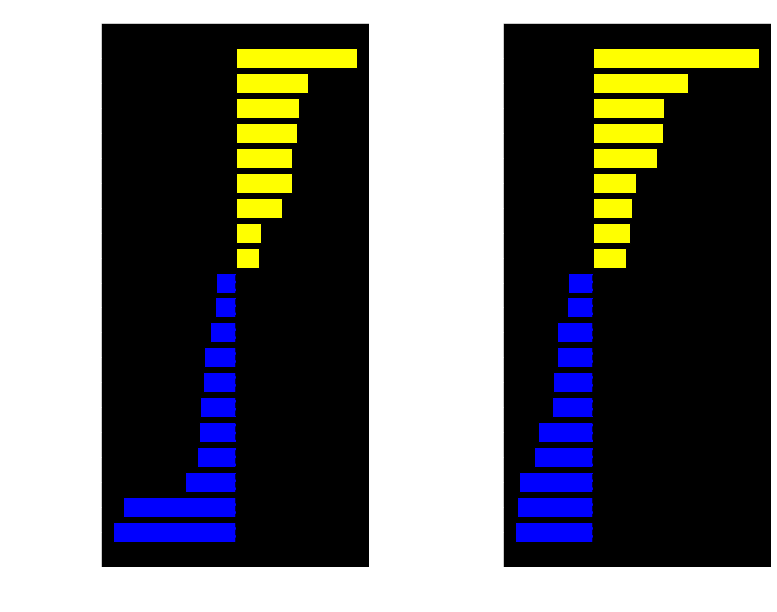

In [40]:
feature_names = countv.get_feature_names()
words_to_grab = 10

fig, ax = plt.subplots(1, 2, figsize=(12, 10))
for i, comp in enumerate(pca.components_):
    top_words = [feature_names[ind] for ind in comp.argsort()[-1:-words_to_grab:-1]]
    bottom_words = [feature_names[ind] for ind in comp.argsort()[words_to_grab::-1]]
    bp_top = ax[i].barh(top_words, comp[comp.argsort()[-1:-words_to_grab:-1]], 
              color='yellow', edgecolor='black')
    bp_bottom = ax[i].barh(bottom_words, comp[comp.argsort()[words_to_grab::-1]], 
              color='blue', edgecolor='black')
    ax[i].axvline(0, linestyle='--', color='black')
    ax[i].set_title(f'Top word loadings for PC {i+1}')
    ax[i].set_xlabel(f'PC {i+1} loading')
    ax[i].invert_yaxis()
plt.subplots_adjust(wspace=0.5)
plt.show()

As we can see from the words contributing the most positive and most negative loadings, PC 1 seems to represent an art vs. activism axis, with words like music, entertainment, and creativity contributing to a positive score. On the other hand, words like global, issues, economics, and change contribute to a negative score.

PC 2 seems to represent something like a technical vs. non-technical axis, with words like science, medicine, and research contributing to positive scores and words like global, music, issues, and politics contributing to negative scores.

Now we have a baseline idea of what sort of talks to expect in each region of PC space.

In [41]:
# Here I define a few helper functions which will be useful throughout the rest of the notebook.

def assign_word_to_cluster(string_list, labels, vocab):
    '''generate a counter to get word counts per cluster, 
    then assign each word to the cluster it's most often associated with'''
    
    texts = [' '.join(string_list.loc[labels==c].values).split(' ') 
             for c in list(set(labels))]

    counters = [Counter(text) for text in texts]

    word_cluster = {}
    for word in vocab:
        cluster_count = []
        for i, c in enumerate(counters):
            cluster_count.append(c[word]/len(np.where(labels == i)))
            word_cluster[word] = np.argmax(cluster_count)

        cluster_lookup = {k: [] for k in range(1+np.max(labels))}
        for k, v in word_cluster.items():
            cluster_lookup[v].append(k)
    return word_cluster, cluster_lookup

def assign_word_to_color(cluster_lookup, cmap):
    ''' map each cluster's associated word to a color;
    return a dictionary of {hex color}: {word_list} for passing to word cloud API'''
    color_dict = {}
    for i, cluster in enumerate(list(cluster_lookup.keys())):
        color_dict[colors.to_hex(cmap(i))] = cluster_lookup[cluster]
    return color_dict

def plot_pc_space(x_pca, pca, labels, pca_comps, cmap):
    ''' plot observations in PC 1-2 space, colored by kmeans label'''
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
    scatter = ax.scatter(x_pca[:,0], x_pca[:,1], c=labels, cmap = cmap)
    #ax.legend(*scatter.legend_elements(), title='Clusters')
    ax.set_xlabel(f'PC 1 ({100*pca.explained_variance_ratio_[0]: 0.2f}%)')
    ax.set_ylabel(f'PC 2 ({100*pca.explained_variance_ratio_[1]: 0.2f}%)')
    ax.set_title(f'{pca_comps} PCs')
    plt.show()
    
# the following function is from the WordCloud API documentation for applying colors to specific words: https://amueller.github.io/word_cloud/index.html
class SimpleGroupedColorFunc(object):
    """Create a color function object which assigns EXACT colors
       to certain words based on the color to words mapping

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color
                              for (color, words) in color_to_words.items()
                              for word in words}

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)

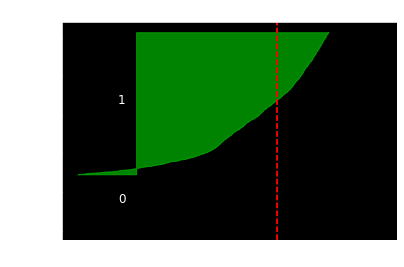

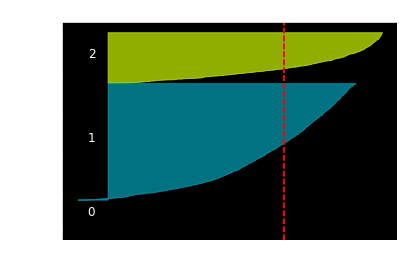

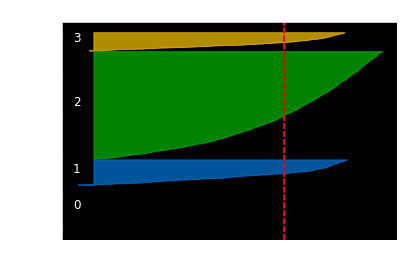

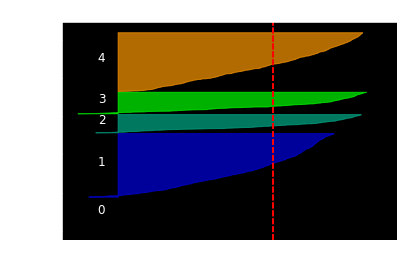

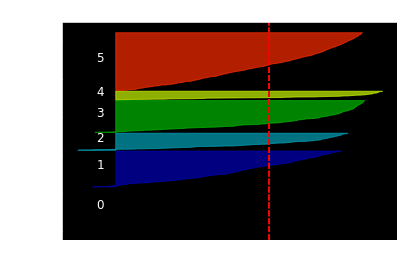

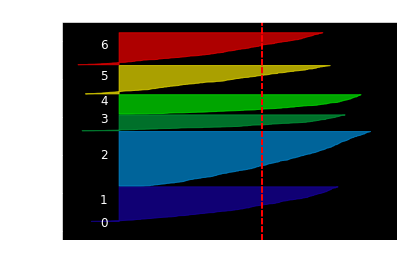

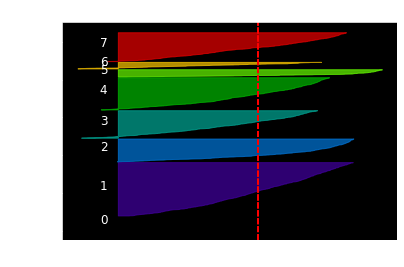

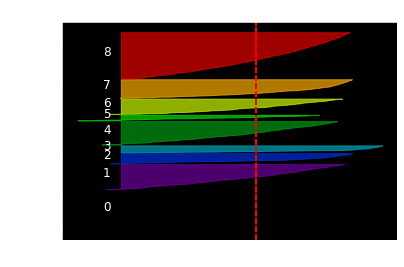

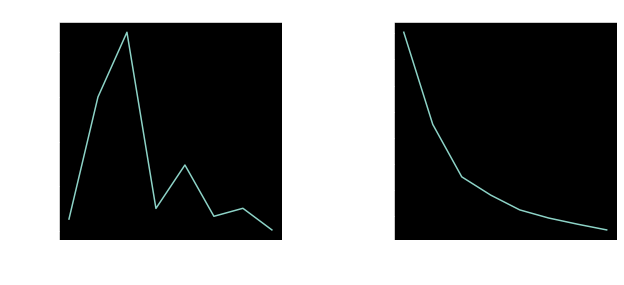

In [42]:
# run silhouette score analysis for data projected onto 2 pc components
pca_comps = 2
pca = PCA(n_components=pca_comps)
x_pca = pca.fit_transform(X_tfidf.toarray())
comps = np.arange(2,10,1)
score = []
silhouette_avg = []
# get kmeans score versus number of components
for n_clusters in comps:
    kmeans = KMeans(n_clusters=n_clusters).fit(x_pca)
    score.append(kmeans.score(x_pca))
    cluster_labels = kmeans.predict(x_pca)
    silhouette_avg.append(silhouette_score(x_pca, cluster_labels))
    sample_silhouette_values = silhouette_samples(x_pca, cluster_labels)
    
    fig, ax1 = plt.subplots(1, 1)
    #ax0.plot(comps, score)
    #ax0.set_xlabel('# components')
    #ax0.set_title('k-means score')

    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        ax1.axvline(silhouette_avg[-1], linestyle='--', color='r')
        ax1.set_ylabel('Observation')
        ax1.set_title(f'Silhouette scores for k={i} clusters')
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
plt.subplots_adjust(hspace=1)
plt.show()

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 4))
ax0.plot(comps, silhouette_avg)
ax0.set_xlabel('# k-means clusters')
ax0.set_ylabel('Mean silhouette score')
ax0.set_title(f'silhouette score: {pca_comps} PCs')
ax1.plot(comps, -np.array(score))
ax1.set_xlabel('# k-means clusters')
ax1.set_ylabel('Mean distance to cluster center')
ax1.set_title(f'Scree plot: {pca_comps} PCs')
plt.subplots_adjust(wspace=0.5)
plt.show()

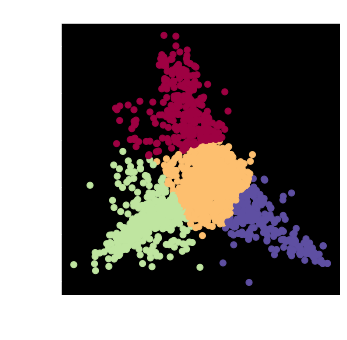

In [43]:
# use 4 k-means clusters for data projected onto 2 PCs
k_clusts = 4
kmeans_pca = KMeans(n_clusters=k_clusts)

pca_comps = 2
pca = PCA(n_components=pca_comps)
x_pca = pca.fit_transform(X_tfidf.toarray())
kmeans_pca.fit(x_pca)

cmap = plt.cm.get_cmap(cmap_string, k_clusts)  

plot_pc_space(x_pca, pca, kmeans_pca.labels_, pca_comps, cmap)

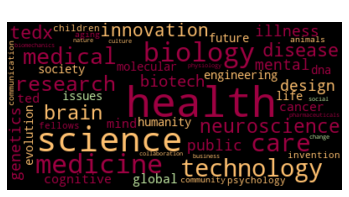

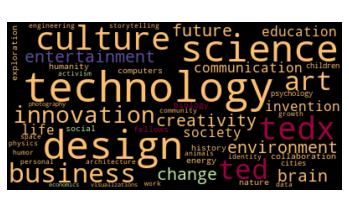

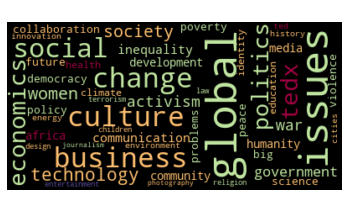

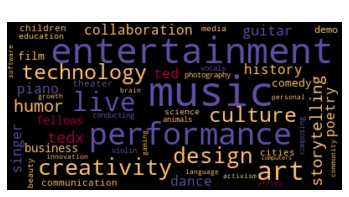

In [44]:
wc, cl = assign_word_to_cluster(df.tags_single_string, kmeans_pca.labels_, countv.vocabulary_)
color_dict = assign_word_to_color(cl, cmap)

for i, clusters in enumerate(list(set(kmeans_pca.labels_))):
    cluster = np.where(kmeans_pca.labels_== clusters)
    text = ' '.join(df['tags_single_string'].str.lower().loc[cluster].values)
    wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="black", collocations=False).generate(text)
    
    default_color = 'grey'
    grouped_color_func = SimpleGroupedColorFunc(color_dict, default_color)
    #grouped_color_func = GroupedColorFunc(color_dict, default_color)
    wordcloud.recolor(color_func=grouped_color_func)
    
    # Display the generated image
    fig, ax = plt.subplots()
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis("off")
    ax.set_title(f'Cluster {i}')
    plt.show()